In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "molise"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,14,Molise,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,14,Molise,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,14,Molise,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,14,Molise,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,14,Molise,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2020-12-26T17:00:00,14,Molise,55,8,63,2260,2323,27,28,...,2.0,397.0,355.0,23.0,12.70,2.71,7.05,7.89,14.29,1.18
306,2020-12-27T17:00:00,14,Molise,55,8,63,2256,2319,-4,1,...,1.0,51.0,48.0,-4.0,12.70,2.72,1.96,2.08,0.00,-0.17
307,2020-12-28T17:00:00,14,Molise,57,8,65,2258,2323,4,7,...,2.0,60.0,56.0,2.0,12.31,2.80,11.67,12.50,0.00,0.17
308,2020-12-29T17:00:00,14,Molise,56,8,64,2150,2214,-109,7,...,2.0,403.0,257.0,-108.0,12.50,2.89,1.74,2.72,0.00,-4.69


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 30, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 44
Nuovi tamponi: 824.0
Percentuale nuovi positivi/nuovi tamponi: 5.3 %
Nuovi guariti: 195.0
Nuovi deceduti: 2.0
Variazione positivi ricoverati con sintomi: -3.0
Variazione positivi in terapia intensiva: 2.0
Variazione positivi in isolamento dimiciliare: -152.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 30, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-31T17:00:00,14,Molise,17,6,23,933,956,68,83,...,5.0,653.0,633.0,69.0,26.09,2.41,12.71,13.11,0.00,7.66
1,2020-11-01T17:00:00,14,Molise,18,5,23,1030,1053,97,101,...,3.0,855.0,816.0,97.0,21.74,2.18,11.81,12.38,-16.67,10.15
2,2020-11-02T17:00:00,14,Molise,22,5,27,1126,1153,100,101,...,1.0,726.0,701.0,96.0,18.52,2.34,13.91,14.41,0.00,9.50
3,2020-11-03T17:00:00,14,Molise,24,6,30,1214,1244,91,93,...,0.0,704.0,673.0,88.0,20.00,2.41,13.21,13.82,20.00,7.89
4,2020-11-04T17:00:00,14,Molise,28,7,35,1207,1242,-2,26,...,0.0,731.0,724.0,-7.0,20.00,2.82,3.56,3.59,16.67,-0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-26T17:00:00,14,Molise,55,8,63,2260,2323,27,28,...,2.0,397.0,355.0,23.0,12.70,2.71,7.05,7.89,14.29,1.18
57,2020-12-27T17:00:00,14,Molise,55,8,63,2256,2319,-4,1,...,1.0,51.0,48.0,-4.0,12.70,2.72,1.96,2.08,0.00,-0.17
58,2020-12-28T17:00:00,14,Molise,57,8,65,2258,2323,4,7,...,2.0,60.0,56.0,2.0,12.31,2.80,11.67,12.50,0.00,0.17
59,2020-12-29T17:00:00,14,Molise,56,8,64,2150,2214,-109,7,...,2.0,403.0,257.0,-108.0,12.50,2.89,1.74,2.72,0.00,-4.69


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

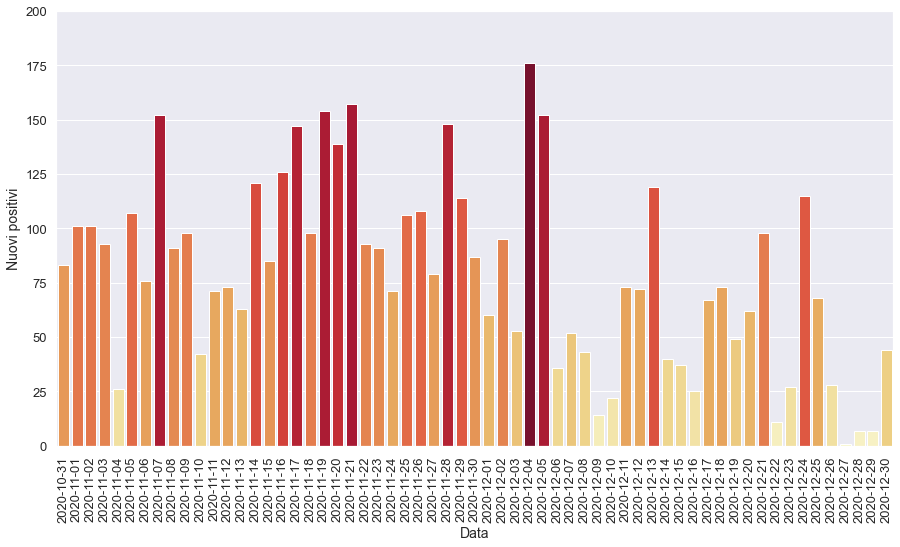

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

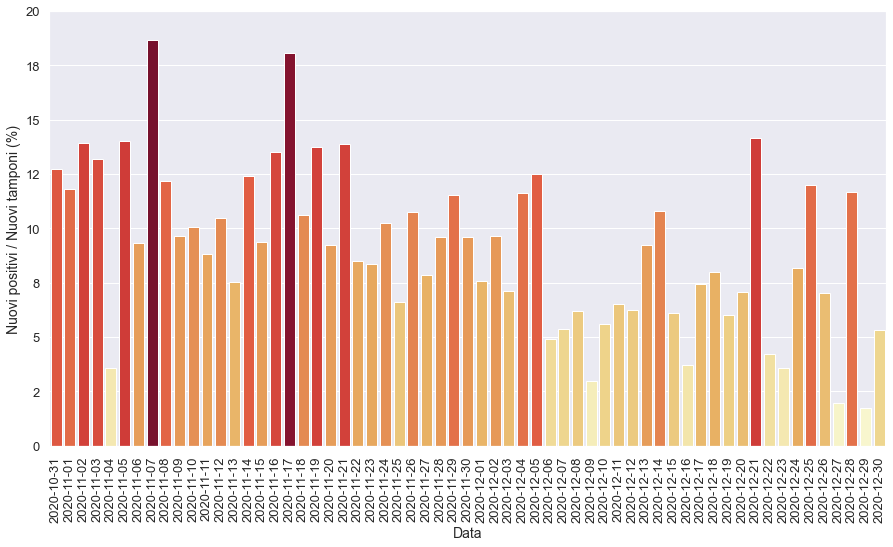

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

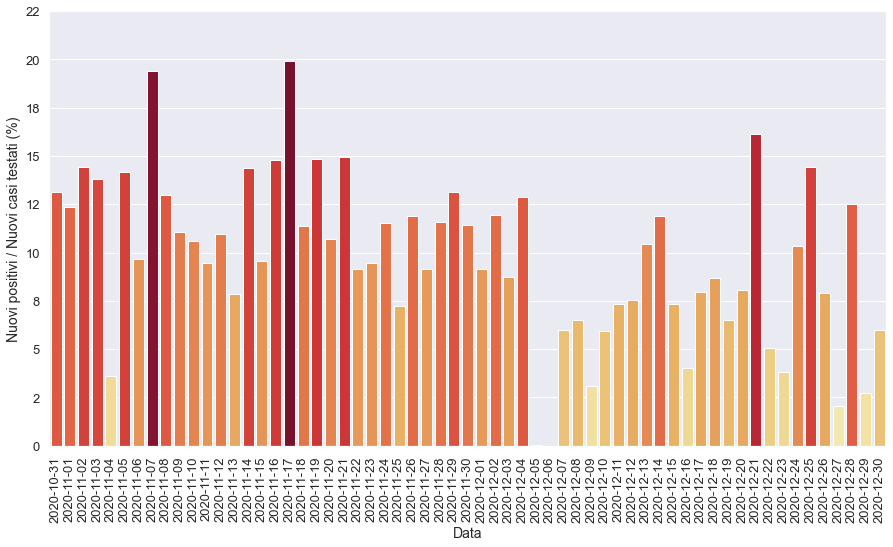

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

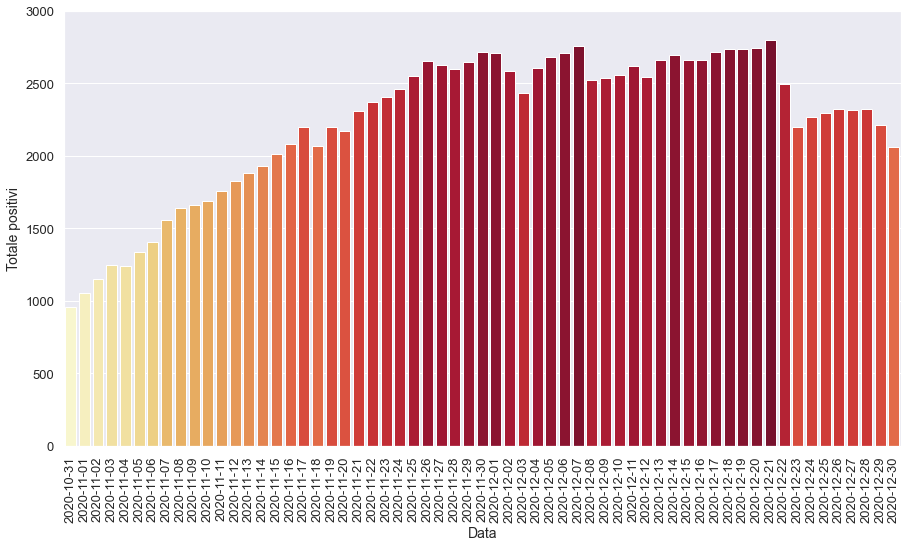

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

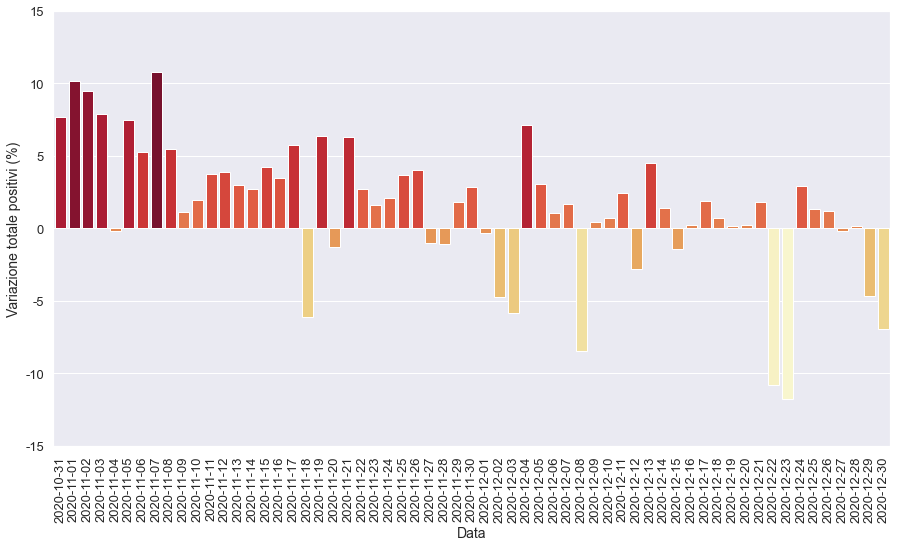

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

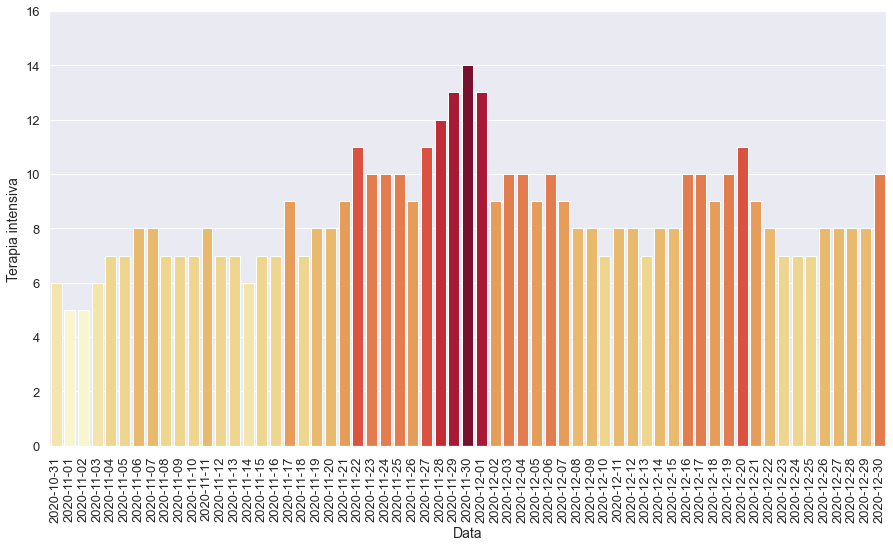

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

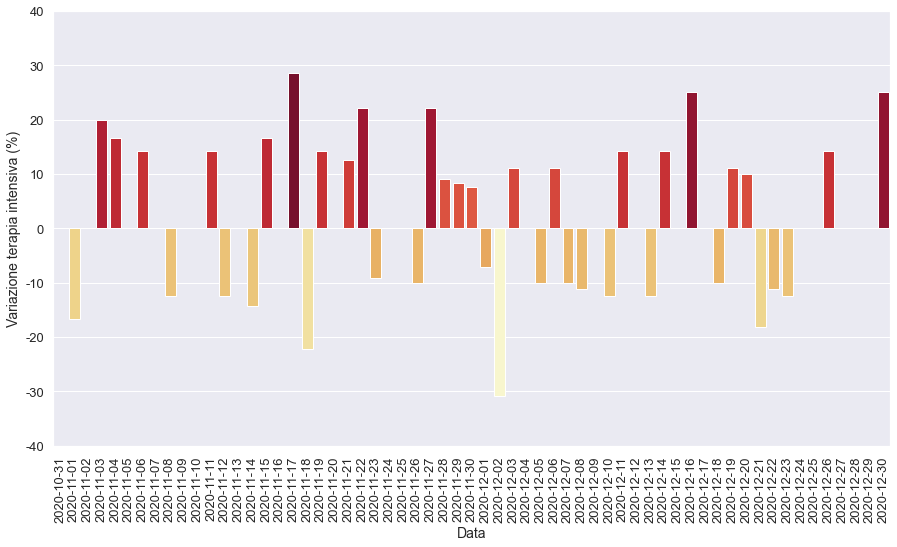

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

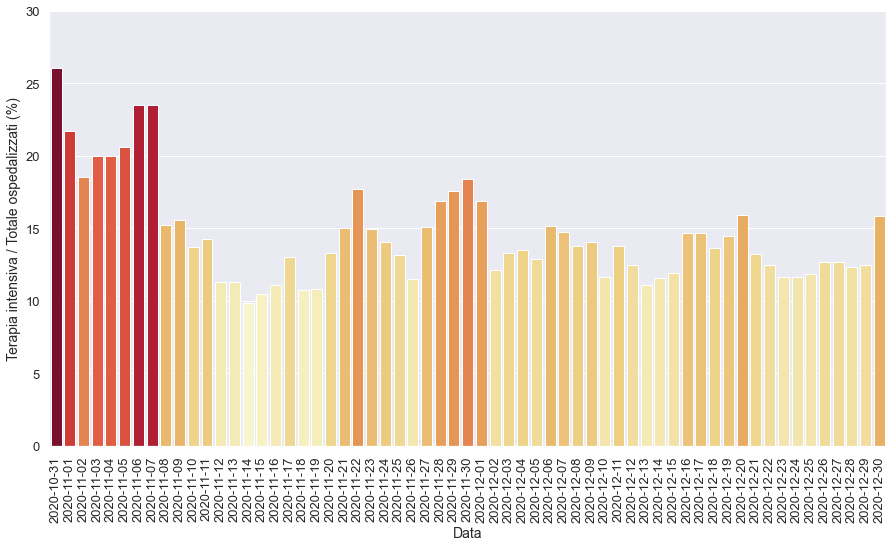

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

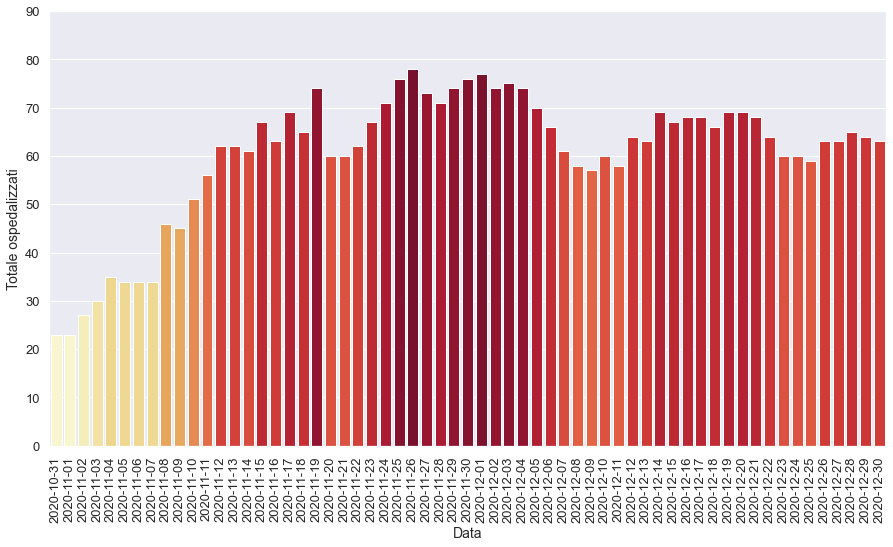

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

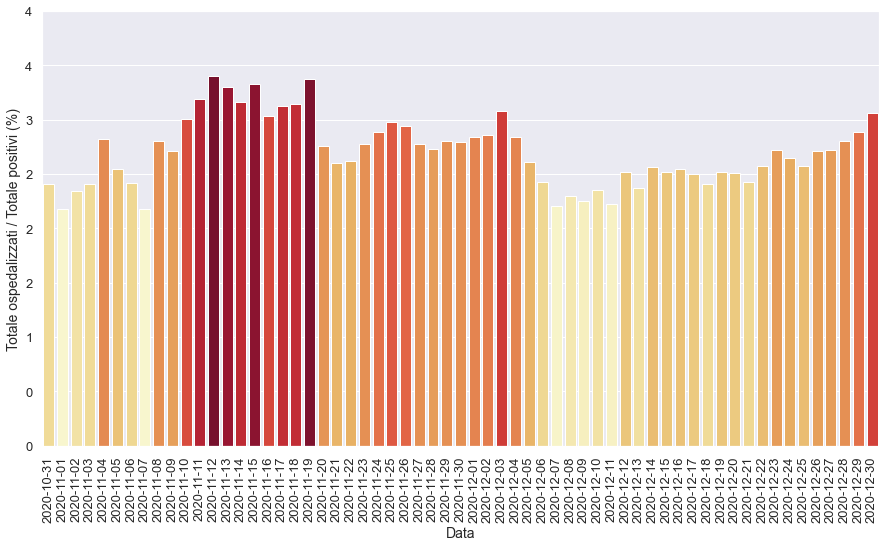

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

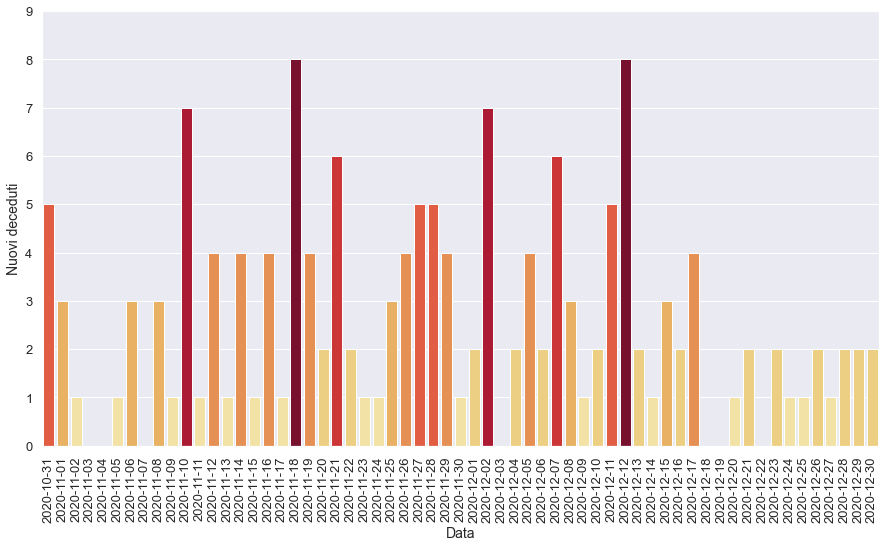

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

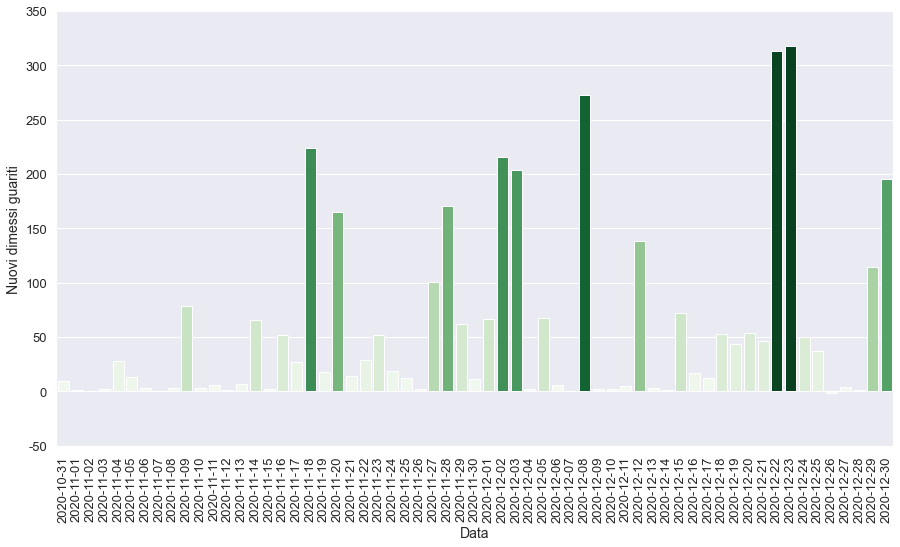

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-30T17:00:00,14,Molise,62,14,76,2644,2720,75,87,...,1.0,906.0,762.0,73.0,18.42,2.79,9.60,11.42,7.69,2.84
1,2020-12-01T17:00:00,14,Molise,64,13,77,2634,2711,-9,60,...,2.0,793.0,655.0,-10.0,16.88,2.84,7.57,9.16,-7.14,-0.33
2,2020-12-02T17:00:00,14,Molise,65,9,74,2509,2583,-128,95,...,7.0,987.0,797.0,-125.0,12.16,2.86,9.63,11.92,-30.77,-4.72
3,2020-12-03T17:00:00,14,Molise,65,10,75,2357,2432,-151,53,...,0.0,743.0,608.0,-152.0,13.33,3.08,7.13,8.72,11.11,-5.85
4,2020-12-04T17:00:00,14,Molise,64,10,74,2531,2605,173,176,...,2.0,1515.0,1368.0,174.0,13.51,2.84,11.62,12.87,0.00,7.11
5,2020-12-05T17:00:00,14,Molise,61,9,70,2615,2685,80,152,...,4.0,1217.0,808624.0,84.0,12.86,2.61,12.49,0.02,-10.00,3.07
6,2020-12-06T17:00:00,14,Molise,56,10,66,2647,2713,28,36,...,2.0,734.0,-806867.0,32.0,15.15,2.43,4.90,-0.00,11.11,1.04
7,2020-12-07T17:00:00,14,Molise,52,9,61,2698,2759,46,52,...,6.0,967.0,870.0,51.0,14.75,2.21,5.38,5.98,-10.00,1.70
8,2020-12-08T17:00:00,14,Molise,50,8,58,2468,2526,-233,43,...,3.0,696.0,663.0,-230.0,13.79,2.30,6.18,6.49,-11.11,-8.45
9,2020-12-09T17:00:00,14,Molise,49,8,57,2480,2537,11,14,...,1.0,471.0,455.0,12.0,14.04,2.25,2.97,3.08,0.00,0.44


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

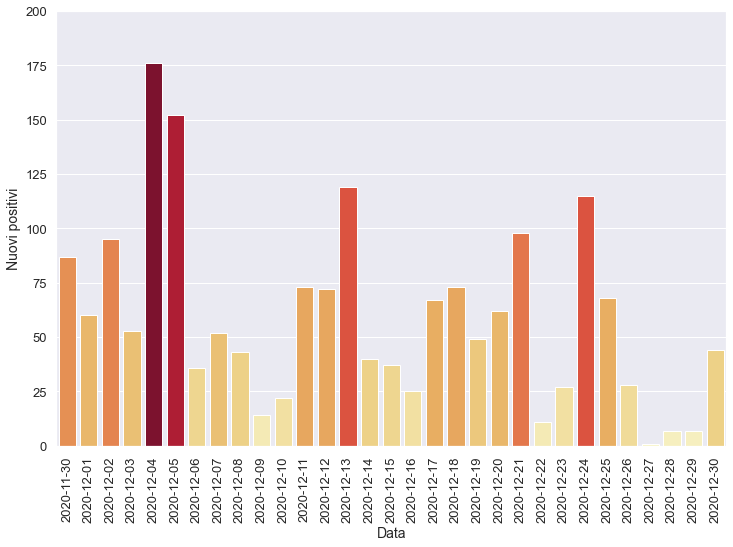

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

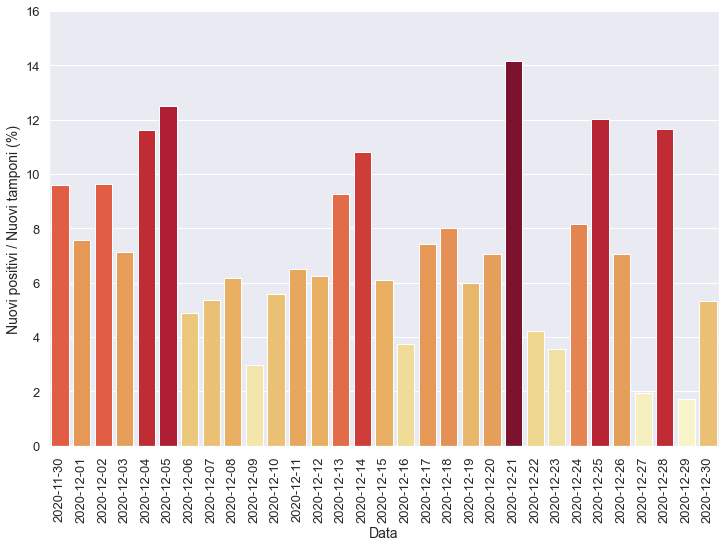

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

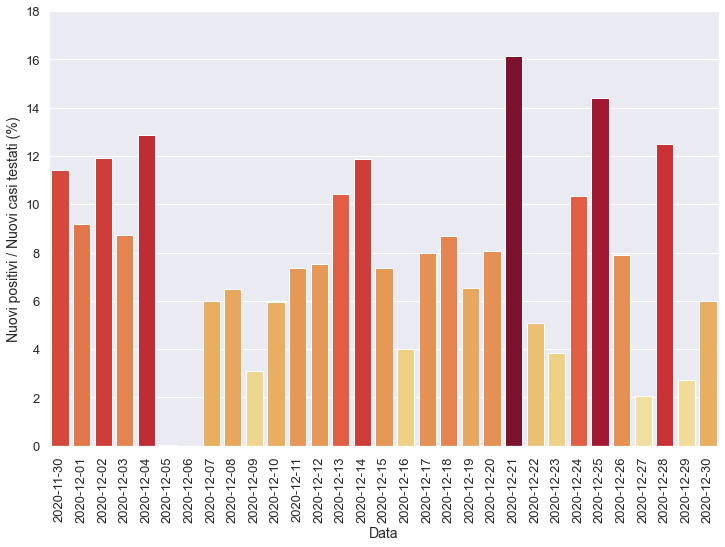

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

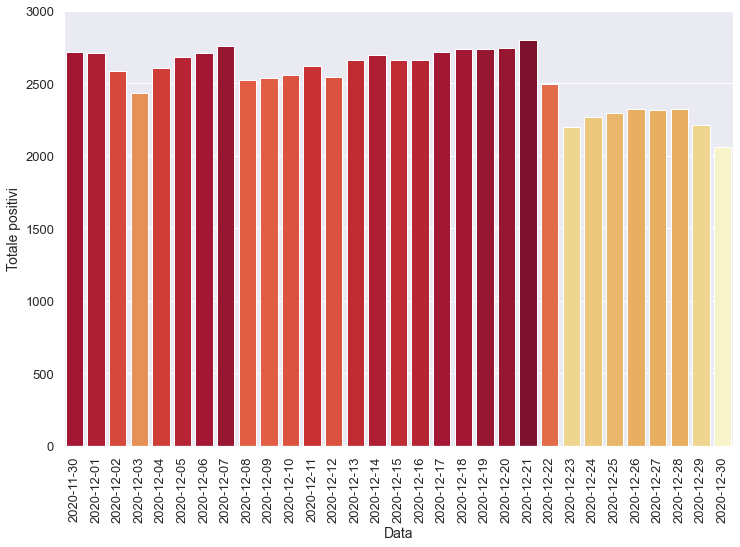

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

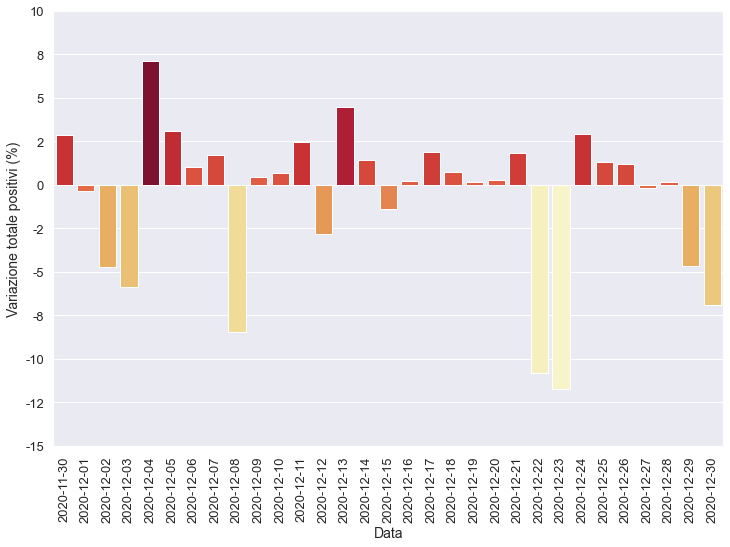

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

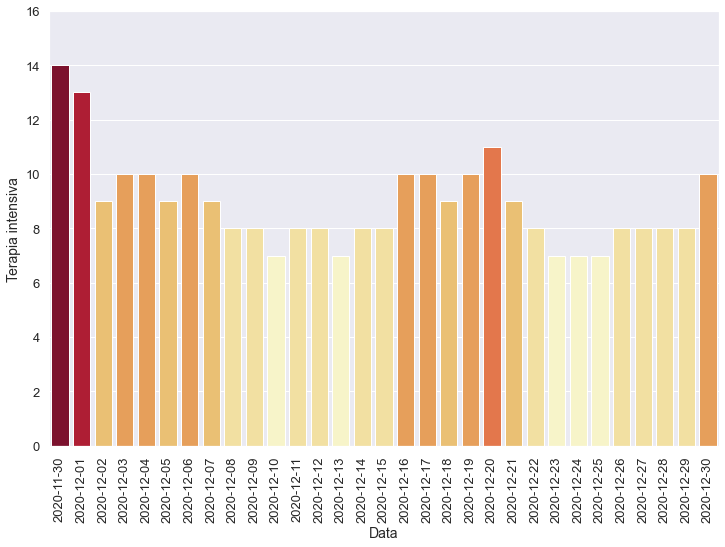

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

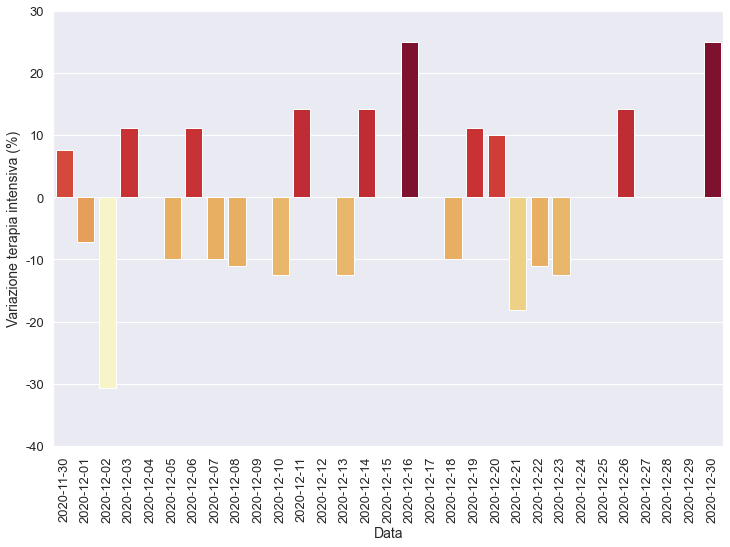

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

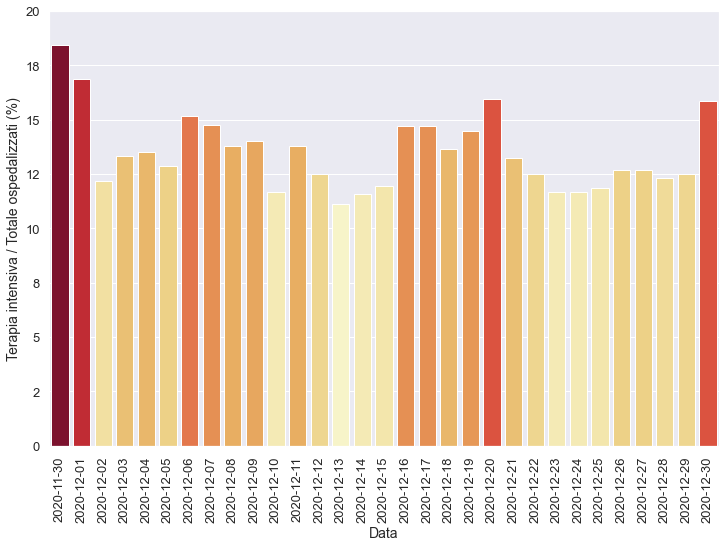

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

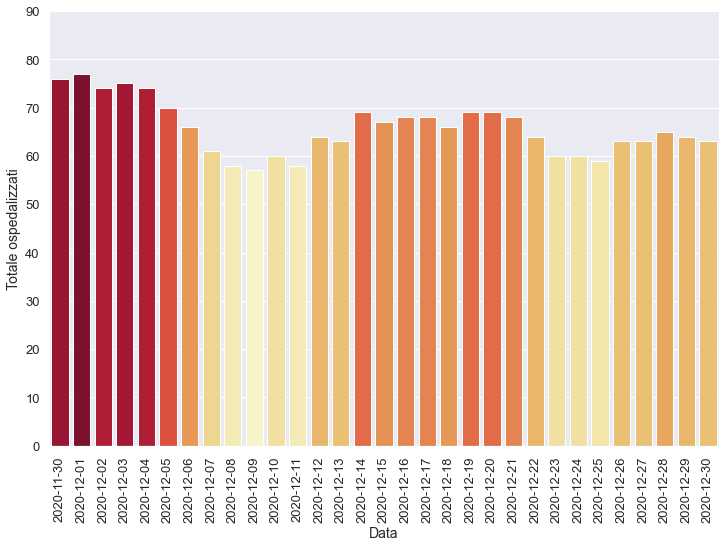

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

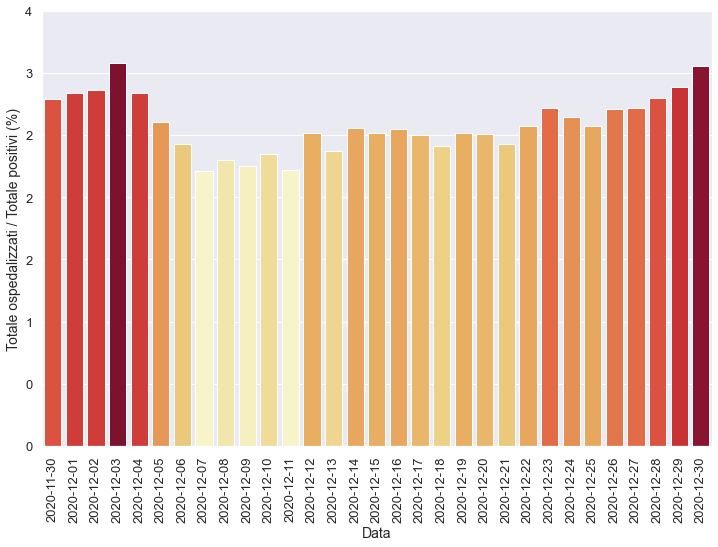

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

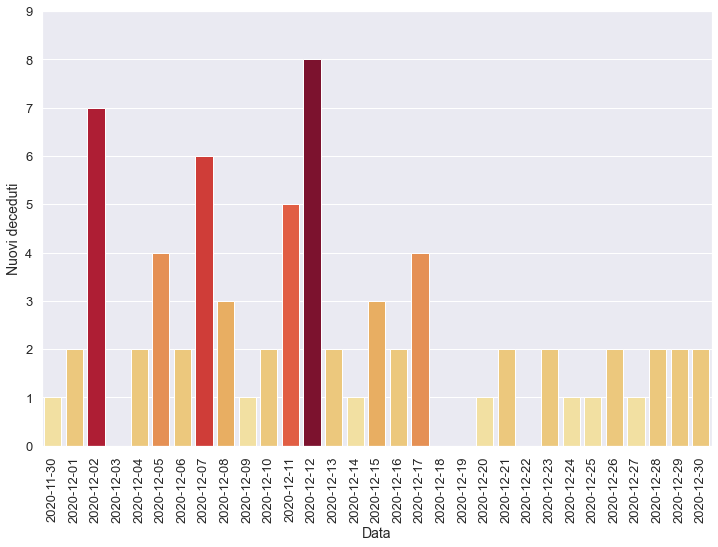

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

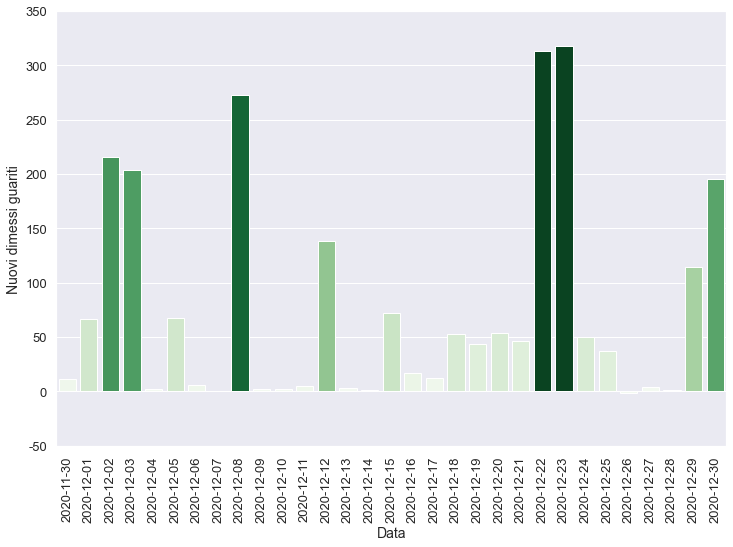

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-23T17:00:00,14,Molise,53,7,60,2142,2202,-293,27,...,2.0,758.0,703.0,-289.0,11.67,2.72,3.56,3.84,-12.50,-11.74
1,2020-12-24T17:00:00,14,Molise,53,7,60,2206,2266,64,115,...,1.0,1408.0,1111.0,64.0,11.67,2.65,8.17,10.35,0.00,2.91
2,2020-12-25T17:00:00,14,Molise,52,7,59,2237,2296,30,68,...,1.0,566.0,472.0,31.0,11.86,2.57,12.01,14.41,0.00,1.32
3,2020-12-26T17:00:00,14,Molise,55,8,63,2260,2323,27,28,...,2.0,397.0,355.0,23.0,12.70,2.71,7.05,7.89,14.29,1.18
4,2020-12-27T17:00:00,14,Molise,55,8,63,2256,2319,-4,1,...,1.0,51.0,48.0,-4.0,12.70,2.72,1.96,2.08,0.00,-0.17
5,2020-12-28T17:00:00,14,Molise,57,8,65,2258,2323,4,7,...,2.0,60.0,56.0,2.0,12.31,2.80,11.67,12.50,0.00,0.17
6,2020-12-29T17:00:00,14,Molise,56,8,64,2150,2214,-109,7,...,2.0,403.0,257.0,-108.0,12.50,2.89,1.74,2.72,0.00,-4.69
7,2020-12-30T17:00:00,14,Molise,53,10,63,1998,2061,-153,44,...,2.0,824.0,733.0,-152.0,15.87,3.06,5.34,6.00,25.00,-6.91


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

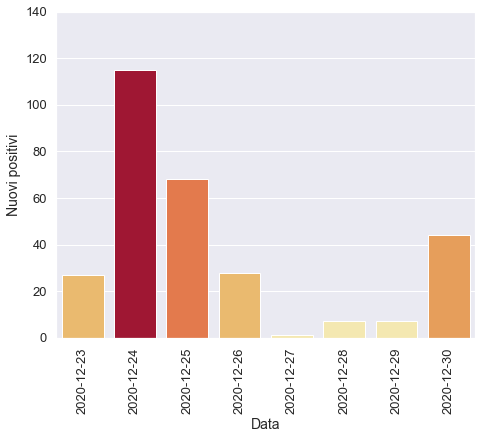

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

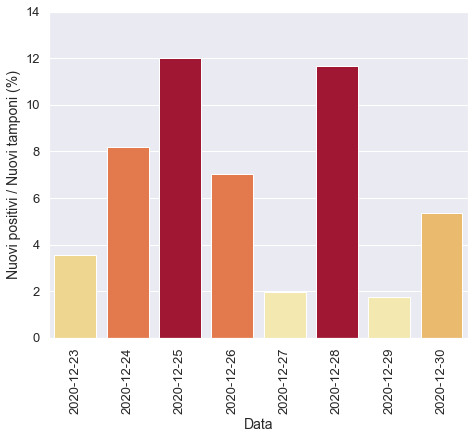

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

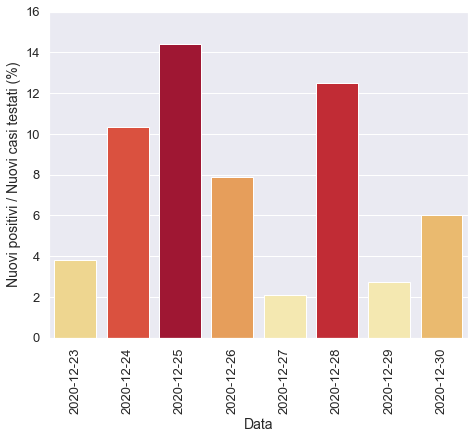

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

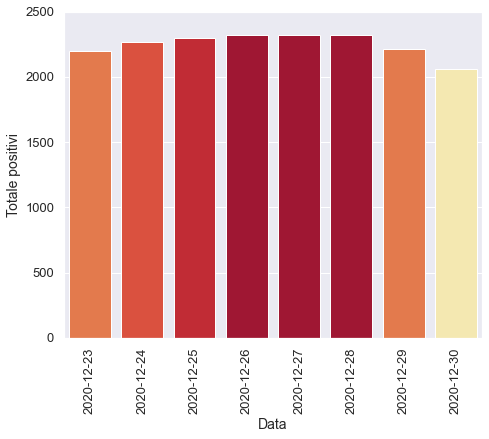

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

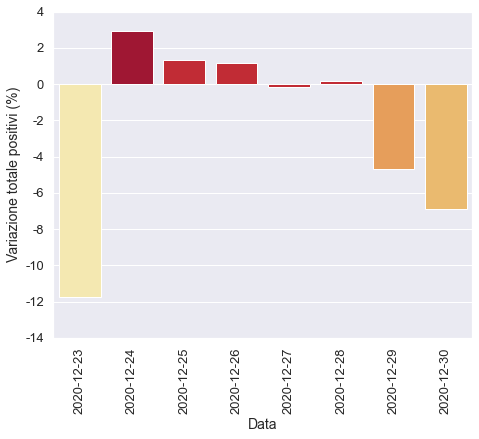

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

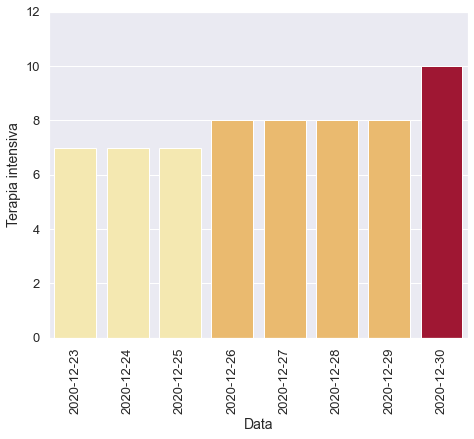

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

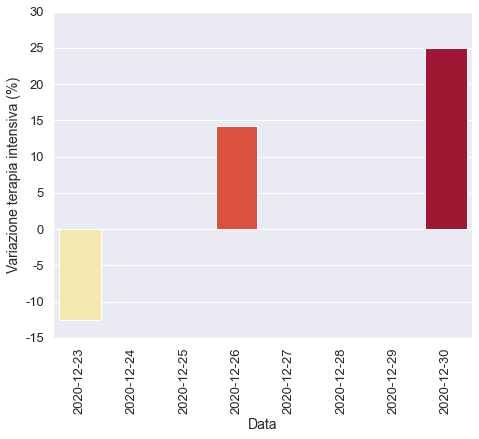

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

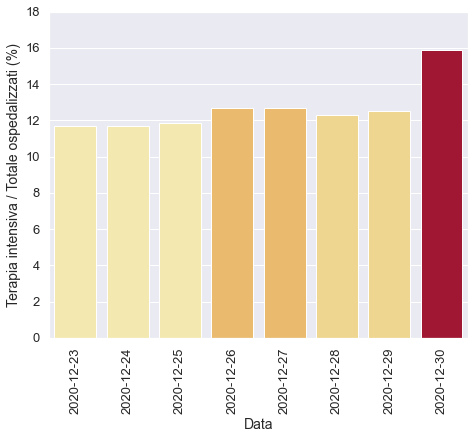

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

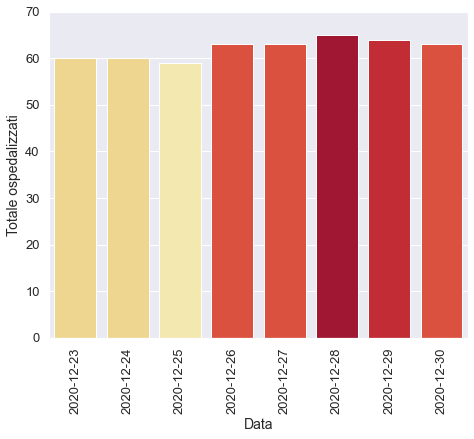

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

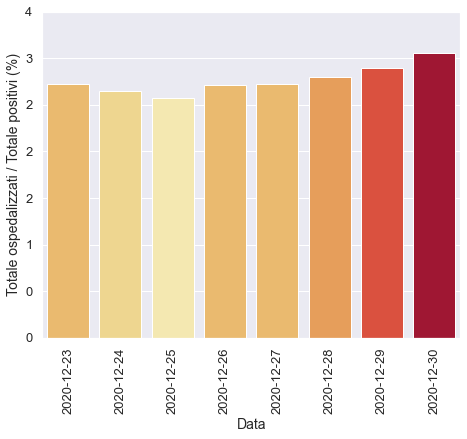

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

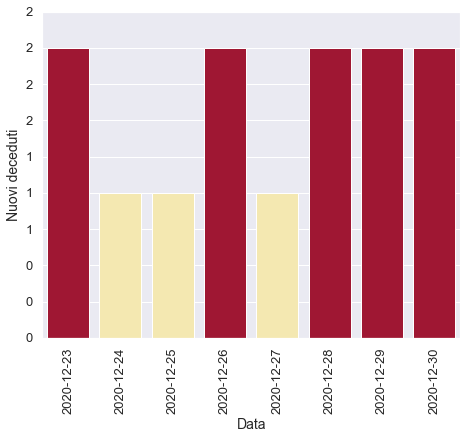

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

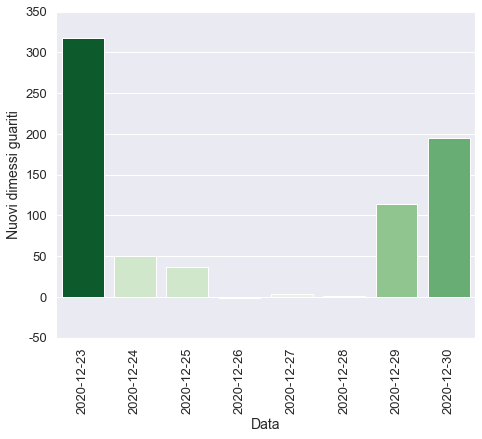

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)